<a href="https://colab.research.google.com/github/TreyBernard/CAP4453/blob/main/3_image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3
1. Upload a personal image in hosting place that can be accesed using an URL.
2. Perform filtering using a 3x3 and then a 5x5 box filter. Show the resulting images. What is the effect of applying a box filter. Explain the differences between the two resulting images.


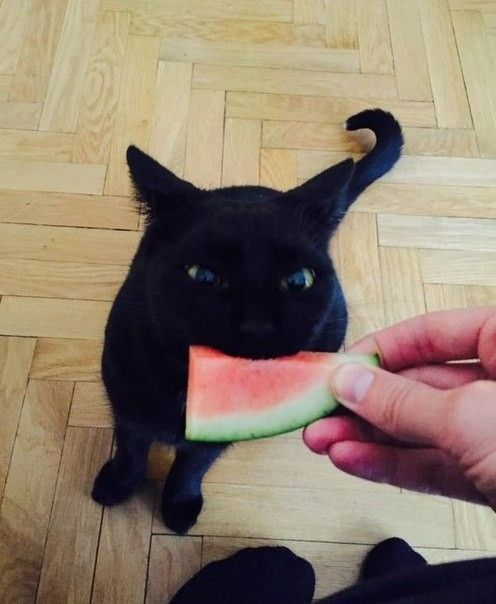

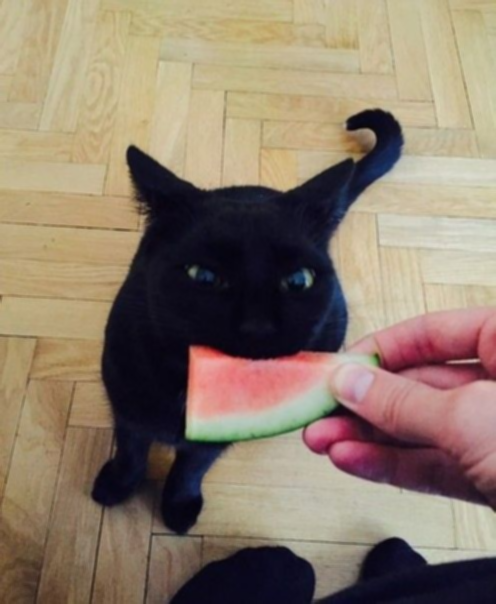

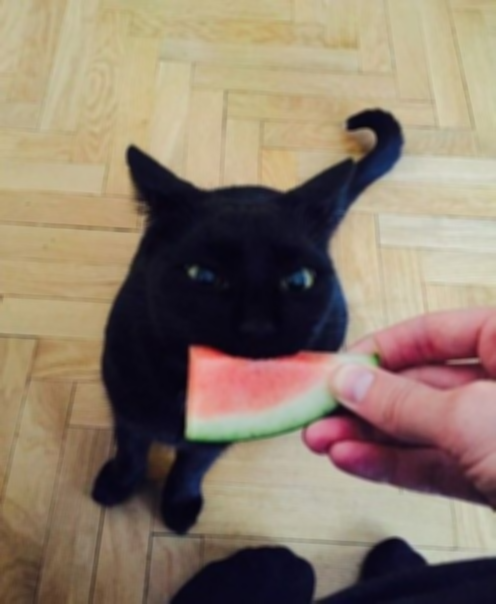

In [2]:
from skimage import io
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


yourUrl = 'https://i.pinimg.com/564x/fc/78/17/fc7817aa236f0c039e7d6d37c907921d.jpg'
image = io.imread(yourUrl)

# convert to BGR if you are using openCV
image_cv = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2_imshow(image_cv)

#prepare the 3x3 shaped filter
k1 = np.ones((3,3),np.float64)/9.0


#prepare the 5x5 shaped filter
k2 = np.ones((5,5),np.float64)/25.0

# apply filter
final_framek1 = cv2.filter2D(image_cv, -1, k1)
final_framek2 = cv2.filter2D(image_cv, -1, k2)


# visualize
cv2_imshow(final_framek1)
cv2_imshow(final_framek2)

#The difference between the two resulting images is that the box filter, a filter meant to smooth an image through replacing each pixel value with the average of
#neighboring pixels, impacts the the 5x5 filter stronger because it uses a larger neighborhood so every value is 1/25



3. Obtain and print two-dimensional Gaussian kernels with the following characteristics:<br>
a) $\sigma^2 = 1$, kernel size: 3x3, <br>b) $\sigma^2 = 1.2$, kernel size: 5x5, <br> c) $\sigma^2 = 1.6$, kernel size: 9x9.





[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
[[0.00490724 0.01712794 0.02598132 0.01712794 0.00490724]
 [0.01712794 0.05978239 0.09068371 0.05978239 0.01712794]
 [0.02598132 0.09068371 0.13755784 0.09068371 0.02598132]
 [0.01712794 0.05978239 0.09068371 0.05978239 0.01712794]
 [0.00490724 0.01712794 0.02598132 0.01712794 0.00490724]]
[[4.51839622e-06 4.02720272e-05 1.92127096e-04 4.90613728e-04
  6.70589458e-04 4.90613728e-04 1.92127096e-04 4.02720272e-05
  4.51839622e-06]
 [4.02720272e-05 3.58940671e-04 1.71241017e-03 4.37279256e-03
  5.97689878e-03 4.37279256e-03 1.71241017e-03 3.58940671e-04
  4.02720272e-05]
 [1.92127096e-04 1.71241017e-03 8.16945202e-03 2.08614265e-02
  2.85141893e-02 2.08614265e-02 8.16945202e-03 1.71241017e-03
  1.92127096e-04]
 [4.90613728e-04 4.37279256e-03 2.08614265e-02 5.32715189e-02
  7.28135332e-02 5.32715189e-02 2.08614265e-02 4.37279256e-03
  4.90613728e-04]
 [6.70589458e-04 5.97689878e-03 

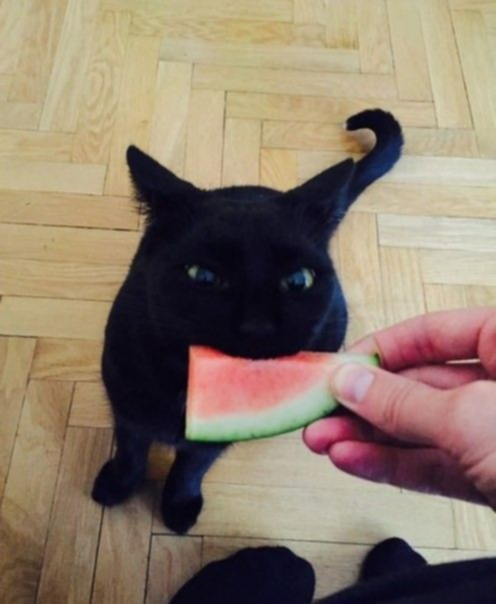

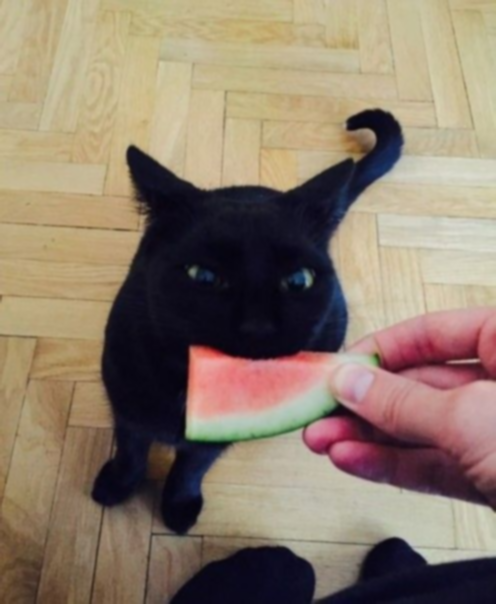

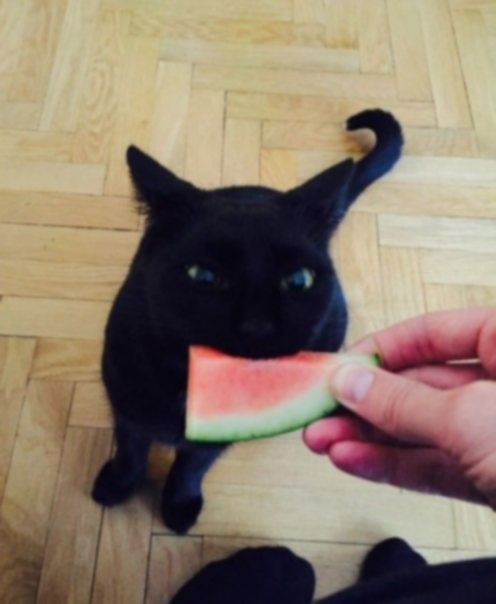

In [3]:
#add your code here

# A possible implementation is here. Modify it play with it:
#
import numpy as np

def gkern(l=5, sig=1.):
  ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
  xx, yy = np.meshgrid(ax, ax)
  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
  return kernel / np.sum(kernel)   #note that this normalize the filter to 1. is it desirable?.

sig_a = np.sqrt(1)
k_a = gkern(l=3, sig=sig_a)

sig_b = np.sqrt(1.2)
k_b = gkern(l=5, sig=sig_b)

sig_c = np.sqrt(1.6)
k_c = gkern(l=9, sig=sig_c)

print(k_a)
print(k_b)
print(k_c)

cv2_imshow(cv2.filter2D(image_cv,-1, k_a))
cv2_imshow(cv2.filter2D(image_cv,-1, k_b))
cv2_imshow(cv2.filter2D(image_cv,-1, k_c))




4. Apply the three
Gaussian kernels obtained previously on your uploaded image. show your filter results. Discuss the differences of
Gaussian operations with different sigmas. Also, compare your results with question 2: what are the differences between these ﬁlters, what do you observe ? Which ﬁltering is the most eﬀective in which images ? Why ?

Applying different gaussian filters with increasing sigmas results in stronger overall blurring of the image. The 3x3 kernel with a sigma of 1 preserves most of the fine detail in the image, while the 9x9 kernel with a sigma of about 1.2 smooths the image out alot more. Comparing the gaussian filter with the box filter it is as if the gaussian filter tends to produce a more natural blur, while the box filter seems more clearly edited. In my opinion, in images where you would want the edges to be more blurred, the box filter would be of better use, however for most other images the use of a gaussian filter would be superior due to central pixels being weighted heavier than they are in box filters.


5. Implement the three steps of Sobel filtering. Apply it to the uploaded image for 3 different thresholds. Show the results on
the screen, and discuss the resulting images.



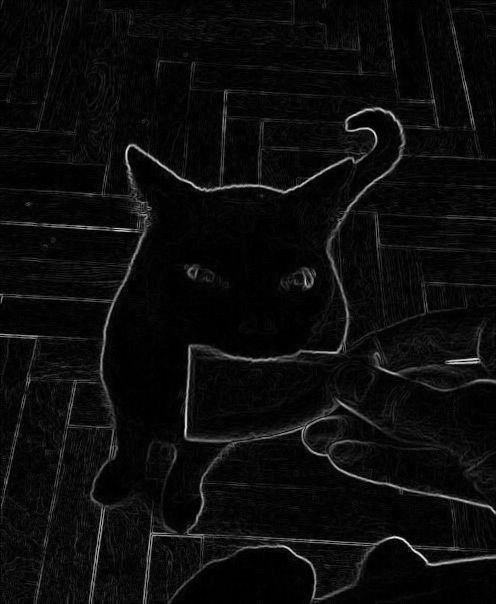

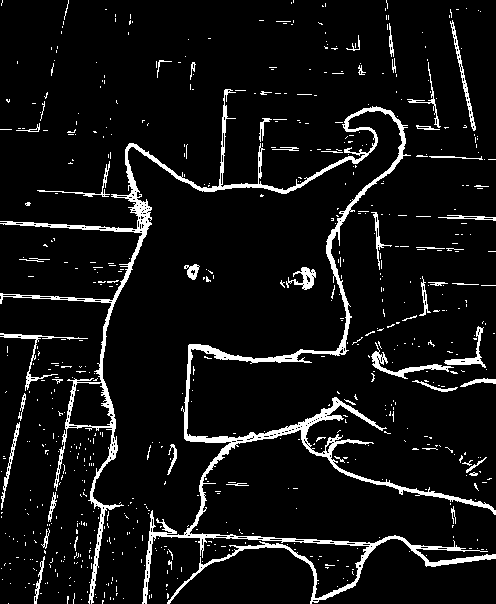

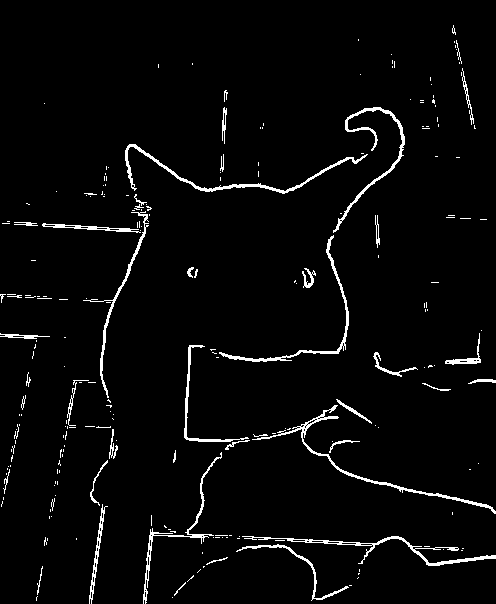

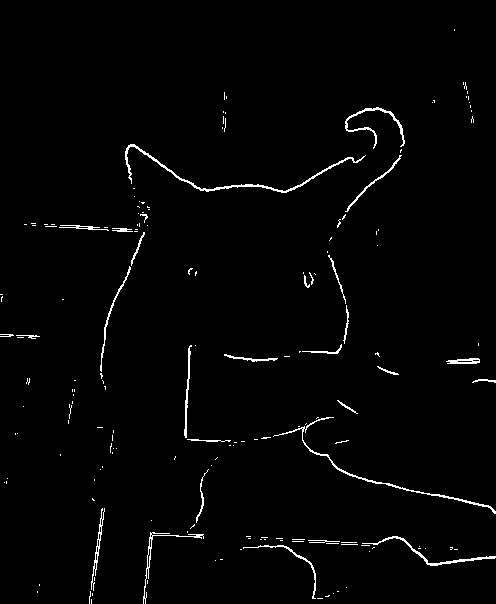

In [15]:
# step 1. Get x and y gradients . Use the correct kernels
image_g = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
grad_x = cv2.Sobel(image_g, cv2.CV_64F, 1, 0,ksize = 3)
grad_y = cv2.Sobel(image_g, cv2.CV_64F, 0, 1,ksize = 3)
# step 2. Compute the magnitude of the gradient
grad_m = cv2.magnitude(grad_x,grad_y)
grad_m = np.uint(256 * grad_m / np.max(grad_m))
cv2_imshow(grad_m)
# Step 3. Threshold. Choose 3 different threshold. visualize outputs
thresholds = [30,60,90]
threshold_image = []
for t in thresholds:
  image_new = np.zeros_like(grad_m, dtype=np.uint8)
  image_new[grad_m > t] = 255
  threshold_image.append(image_new)

for i, (t,img) in enumerate(zip(thresholds,threshold_image)):
  cv2_imshow(img)

  #the first image is the original in grayscale, while only highlighting the prominent edges while including a decent amount of noise
  #the second image detects edges still, but some weaker edges are excluded
  #the third image displays edges that aren't considered weak, and filtering out a decent amount of noise
  #the last image only displays the most prominent edges and nearly getting rid of all noise
  #so in summary as the thresholds increase, the priority of edges shown has a linear relationship to how prominent they are, and there is a negative relationship between threshold and noise.

Edit your comments here


6. Use canny edge detector incorporated in opencv. Pick two diferent sets of hysteresys thresholds. What can you tell about the effect on the obtained edges.  


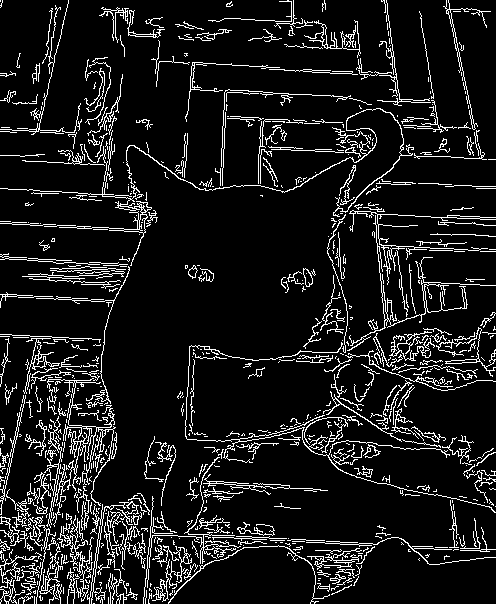

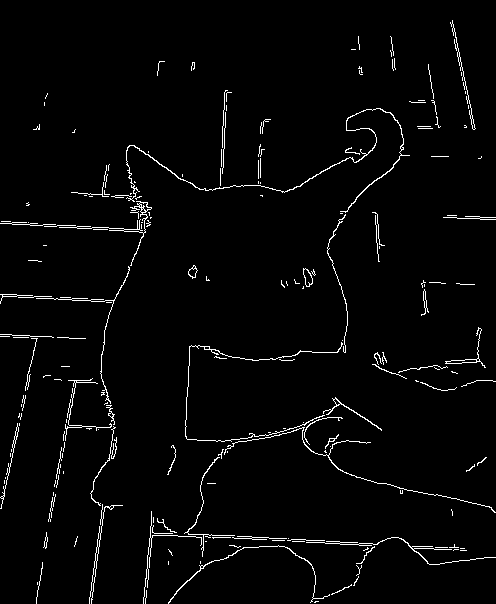

In [16]:
# use the canny from openCV
parameters = {
    'set1': {'threshold1': 30, 'threshold2': 90},
    'set2': {'threshold1': 120, 'threshold2': 180}
}
for key, params in parameters.items():
  image_edge = cv2.Canny(image_g,params['threshold1'],params['threshold2'])
  cv2_imshow(image_edge)

#it seems like with higher thresholds, the edges that get detected get altered as well
#there seems to be a negative relationship between the threshold values and the amount of edges shown.
#so with higher thresholds, there will be fewer edges but they are the more prominent edges in the image.

Edit your comments here

Now, you are going to use morphological operations to try to count automatically the number of rice grains from an image.

7. Read image, convert it to gray scale and apply a bilateral filter.
<br>A bilateral filter is a filter that smooth where there is not changes on the gray scale preserving values close to edges. To understand bilateral filters  [Click here](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)


In [23]:
from skimage import io
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = io.imread('https://i.stack.imgur.com/pgWt1.jpg')   #io.imread reads in the format RGB. if we were using opencv native read, the read with  be already BGR and the following conversion wouldn't be neccesary
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# utilize cvtColor to convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the gray scale image
cv2_imshow(gray)

# apply a bilateral filter. Adjust the value to your convenience
diameter_neighborhood= 11
sigma_color_space = 17
sigma_spatial_space = 5
gray = cv2.bilateralFilter(gray, diameter_neighborhood, sigma_color_space, sigma_spatial_space)
cv2_imshow(gray)




HTTPError: HTTP Error 403: Forbidden

8. Compute the edges of the previous image with a Canny filter. Adjust the thresholds of the canny filter to obtain the best edge you can.

In [ ]:
# use the canny from openCV
# threshold1 =
# threshold2 =
#edges = cv2.Canny(	gray, threshold1, threshold2)
cv2_imshow(edges)


9. Apply a closing operation to the edges of the image. Experiment with different kernel sizes (3,5,9).


In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

10. Find the countours (curve joining all the continuous points (along the boundary)) of the object, display the grains you found in the image. Explanation of contours is [here](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html).
<br>a) what the values of the variable (array) cnts represents?  <br>b) What the variable "peri" represents?  <br>c) Change the color of the contour to red

In [ ]:
i=0
cnts,heir= cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]


print("A total of " + str(len(cnts)) + " grains were found")
for c in cnts:
	peri = cv2.arcLength(c, True)

  #an approximation of the contour of the figure
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# Understand what are the parameters of this function
	cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)

  # crop the image
	x,y,w,h =cv2.boundingRect(c)
	i=i+1;
	print(i)
	newImage=img[y:y+h,x:x+w]
	cv2_imshow(newImage)

print("the grains")
cv2_imshow(img)
